<a href="https://colab.research.google.com/github/yashh18/Wine-quality-prediction/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
from google.colab import files
uploaded = files.upload() 

Saving winequalityN.csv to winequalityN.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['winequalityN.csv']))

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

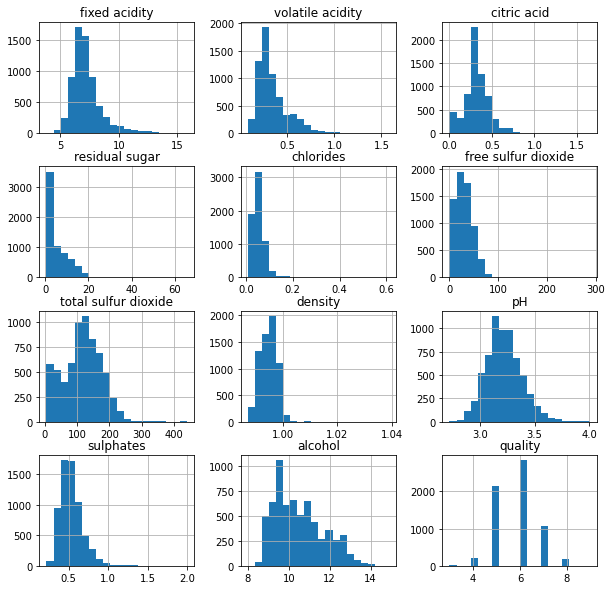

In [7]:
df.hist(bins=20,figsize=(10,10))
plt.show()

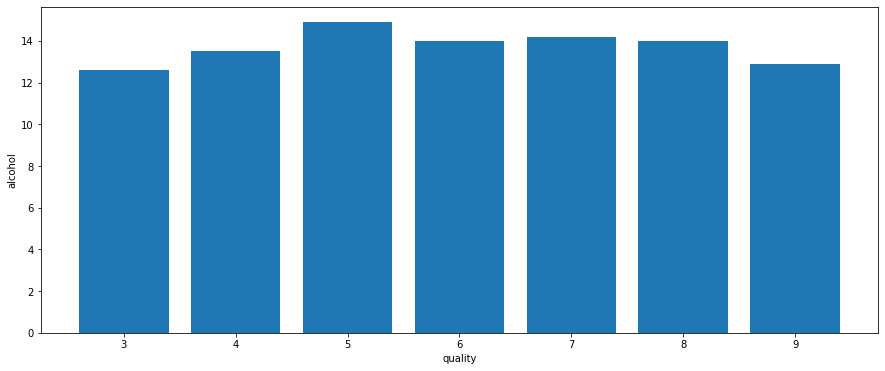

In [8]:
plt.figure(figsize=(15,6))
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

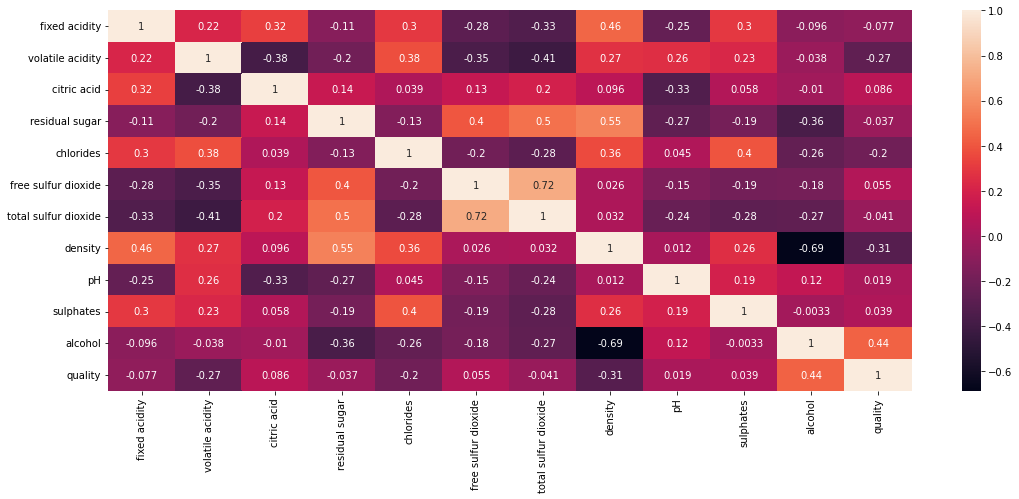

In [9]:
plt.figure(figsize=(18,7))
sb.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
colm = []
for i in range(len(df.corr().keys())):
  for j in range(i):
    if abs(df.corr().iloc[i,j]) > 0.7:
      colm = df.corr().columns[i]

In [12]:
new_df = df.drop('total sulfur dioxide', axis=1)

In [13]:
new_df.update(new_df.fillna(new_df.mean()))

In [14]:
cat = new_df.select_dtypes(include = 'O')
df_dummies = pd.get_dummies(new_df, drop_first= True)
print(df_dummies)

      fixed acidity  volatile acidity  ...  quality  type_white
0               7.0             0.270  ...        6           1
1               6.3             0.300  ...        6           1
2               8.1             0.280  ...        6           1
3               7.2             0.230  ...        6           1
4               7.2             0.230  ...        6           1
...             ...               ...  ...      ...         ...
6492            6.2             0.600  ...        5           0
6493            5.9             0.550  ...        6           0
6494            6.3             0.510  ...        6           0
6495            5.9             0.645  ...        5           0
6496            6.0             0.310  ...        6           0

[6497 rows x 12 columns]


In [15]:
df_dummies['best quality'] = [1 if x>=7 else 0 for x in df.quality]
print(df_dummies)

      fixed acidity  volatile acidity  ...  type_white  best quality
0               7.0             0.270  ...           1             0
1               6.3             0.300  ...           1             0
2               8.1             0.280  ...           1             0
3               7.2             0.230  ...           1             0
4               7.2             0.230  ...           1             0
...             ...               ...  ...         ...           ...
6492            6.2             0.600  ...           0             0
6493            5.9             0.550  ...           0             0
6494            6.3             0.510  ...           0             0
6495            5.9             0.645  ...           0             0
6496            6.0             0.310  ...           0             0

[6497 rows x 13 columns]


In [16]:
from sklearn.model_selection import train_test_split
x = df_dummies.drop(['quality','best quality'], axis=1)
y = df_dummies['best quality']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [17]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
print(new_xtrain)

[[0.34710744 0.1        0.22289157 ... 0.14044944 0.26086957 1.        ]
 [0.20661157 0.18       0.15662651 ... 0.15168539 0.11594203 1.        ]
 [0.24793388 0.06666667 0.18072289 ... 0.16853933 0.14492754 1.        ]
 ...
 [0.33884298 0.38666667 0.         ... 0.20224719 0.2173913  0.        ]
 [0.24793388 0.34       0.06024096 ... 0.25280899 0.24637681 0.        ]
 [0.19008264 0.16666667 0.19277108 ... 0.24157303 0.2173913  1.        ]]


In [25]:
#using randomforestclassifier for best accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
rnd = RandomForestClassifier()
rnd.fit(new_xtrain,y_train)
rnd_score = rnd.score(new_xtest,y_test)
print(' Score of model is :', rnd_score)
print('      ......................... ')
print('calculating the error')
y_predict = rnd.predict(new_xtest)
MSE  = mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(MSE)
print('Mean squared error is :', MSE)
print(' Root mean squared error is :', RMSE)
print(classification_report(y_test,y_predict))

 Score of model is : 0.8661538461538462
      ......................... 
calculating the error
Mean squared error is : 0.13384615384615384
 Root mean squared error is : 0.3658499061721266
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1029
           1       0.79      0.49      0.60       271

    accuracy                           0.87      1300
   macro avg       0.83      0.73      0.76      1300
weighted avg       0.86      0.87      0.85      1300



In [26]:
x_predict = list(rnd.predict(new_xtest))
predicted_df = {'predicted values': x_predict, 'original values': y_test}
pd.DataFrame(predicted_df).head(20)

,predicted values,original values
369,0,0
6243,0,0
3374,0,0
1009,0,0
220,0,0
4019,0,0
871,0,0
3710,0,0
3781,0,0
1248,0,1
